In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install tabulate

In [3]:
# import python libraries
import numpy as np # mathematical use
import pandas as pd # dataframe
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sn
import os

In [4]:
current_dir = os.getcwd()
file_path = current_dir + "/DA Assignment.xlsx"
print(file_path)

C:\Users\Shivangi\Downloads\Plum_Assigment/DA Assignment.xlsx


In [5]:
df=pd.read_excel(file_path) #import excel file

In [6]:
df.shape # no. of row and column

(16476, 23)

In [7]:
df.head()

,Id,Requester id,Group,Status,Priority,Via,Created at,Updated at,Assigned at,Initially assigned at,...,Reopens,Replies,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours,Manual Tagging of Categories [list]
0,297732,10300555531549,Support,Solved,Low,Mail,2023-04-08 20:52:00,2023-06-14 16:30:00,2023-04-09 10:28:00,2023-04-09 10:28:00,...,11,11,173.0,12975.0,6488.0,96218.0,47978.0,17853.0,8516.0,Is my treatment covered (IMTC)
1,311457,10420228868125,Reimbursement Claims,Closed,Low,Mail,2023-04-24 19:32:00,2023-06-15 16:37:00,2023-04-25 10:18:00,2023-04-25 10:18:00,...,10,10,1527.0,2984.0,1527.0,45893.0,22853.0,30113.0,15139.0,-
2,329907,10991633548957,Support,Solved,Low,Mail,2023-05-16 17:43:00,2023-05-30 14:56:00,2023-05-16 18:18:00,2023-05-16 18:18:00,...,10,11,61.0,1563.0,843.0,19993.0,9913.0,7115.0,3335.0,Claims
3,301553,10376247288477,Support,Solved,Low,Mail,2023-04-13 11:03:00,2023-06-15 20:55:00,2023-04-13 13:04:00,2023-04-13 13:04:00,...,9,9,381.0,2888.0,1448.0,91313.0,45953.0,18221.0,9401.0,Claims
4,310966,7302858920989,Support,Closed,Low,Mail,2023-04-24 13:21:00,2023-06-08 18:37:00,2023-04-27 14:48:00,2023-04-24 13:48:00,...,9,9,37.0,37.0,37.0,36304.0,17739.0,7427.0,4008.0,Claims


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Id                                                      16476 non-null  int64         
 1   Requester id                                            16476 non-null  int64         
 2   Group                                                   16476 non-null  object        
 3   Status                                                  16476 non-null  object        
 4   Priority                                                16476 non-null  object        
 5   Via                                                     16476 non-null  object        
 6   Created at                                              16476 non-null  datetime64[ns]
 7   Updated at                                              16

**DATA CLEANING**

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values Table:")
print(missing_values)

Missing Values Table:
Id                                                            0
Requester id                                                  0
Group                                                         0
Status                                                        0
Priority                                                      0
Via                                                           0
Created at                                                    0
Updated at                                                    0
Assigned at                                                   0
Initially assigned at                                         0
Solved at                                                     0
Resolution time                                               0
Satisfaction Score                                        11023
Reopens                                                       0
Replies                                                       0
First reply time i

In [21]:
numeric_columns = ['Assigned at', 'Initially assigned at', 'Solved at', 'Resolution time', 'First reply time in minutes within business hours', 'First resolution time in minutes', 'First resolution time in minutes within business hours', 'Full resolution time in minutes', 'Full resolution time in minutes within business hours', 'Requester wait time in minutes', 'Requester wait time in minutes within business hours']

for column in numeric_columns:
    df.loc[:, column] = df[column].fillna(df[column].mean())

In [22]:
# Replace missing values in 'Satisfaction Score' column with a placeholder value
df.loc[:, 'Satisfaction Score'] = df['Satisfaction Score'].fillna('Not Available')

In [23]:
#  Check data types
data_types = df.dtypes
print("Data Types:")
print(data_types)

Data Types:
Id                                                                 int64
Requester id                                                       int64
Group                                                             object
Status                                                            object
Priority                                                          object
Via                                                               object
Created at                                                datetime64[ns]
Updated at                                                datetime64[ns]
Assigned at                                               datetime64[ns]
Initially assigned at                                     datetime64[ns]
Solved at                                                 datetime64[ns]
Resolution time                                                  float64
Satisfaction Score                                                object
Reopens                                

In [24]:
# Check for duplicate values
duplicates = df.duplicated()
print("duplicates Values in a Table:")
print(duplicates)

duplicates Values in a Table:
0        False
1        False
2        False
3        False
4        False
         ...  
16471    False
16472    False
16473    False
16474    False
16475    False
Length: 16476, dtype: bool


In [25]:
# Save the cleaned dataset to a new file or overwrite the existing one
df.to_excel('cleaned_data.xlsx', index=False)

In [18]:
df.head()

,Id,Requester id,Group,Status,Priority,Via,Created at,Updated at,Assigned at,Initially assigned at,...,Reopens,Replies,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours,Manual Tagging of Categories [list]
0,297732,10300555531549,Support,Solved,Low,Mail,2023-04-08 20:52:00,2023-06-14 16:30:00,2023-04-09 10:28:00,2023-04-09 10:28:00,...,11,11,173.0,12975.0,6488.0,96218.0,47978.0,17853.0,8516.0,Is my treatment covered (IMTC)
1,311457,10420228868125,Reimbursement Claims,Closed,Low,Mail,2023-04-24 19:32:00,2023-06-15 16:37:00,2023-04-25 10:18:00,2023-04-25 10:18:00,...,10,10,1527.0,2984.0,1527.0,45893.0,22853.0,30113.0,15139.0,-
2,329907,10991633548957,Support,Solved,Low,Mail,2023-05-16 17:43:00,2023-05-30 14:56:00,2023-05-16 18:18:00,2023-05-16 18:18:00,...,10,11,61.0,1563.0,843.0,19993.0,9913.0,7115.0,3335.0,Claims
3,301553,10376247288477,Support,Solved,Low,Mail,2023-04-13 11:03:00,2023-06-15 20:55:00,2023-04-13 13:04:00,2023-04-13 13:04:00,...,9,9,381.0,2888.0,1448.0,91313.0,45953.0,18221.0,9401.0,Claims
4,310966,7302858920989,Support,Closed,Low,Mail,2023-04-24 13:21:00,2023-06-08 18:37:00,2023-04-27 14:48:00,2023-04-24 13:48:00,...,9,9,37.0,37.0,37.0,36304.0,17739.0,7427.0,4008.0,Claims


**Data Analysis and Visualization**

In [27]:
df.describe()

,Id,Requester id,Created at,Updated at,Assigned at,Initially assigned at,Solved at,Resolution time,Reopens,Replies,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours
count,16476.000000,1.647600e+04,16476,16476,16476,16476,16476,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000
mean,316876.239743,8.422350e+12,2023-05-01 06:50:28.721776896,2023-05-27 03:16:13.368536320,2023-05-03 21:48:01.163516416,2023-05-03 06:29:41.244264704,2023-05-09 05:58:24.318134784,205.246235,0.242899,2.152525,1852.113950,10177.772752,5131.839693,12314.136304,6196.644320,10443.141238,5259.864213
min,291015.000000,5.879787e+12,2023-04-01 00:31:00,2023-04-02 21:35:00,2023-04-01 10:03:00,2023-04-01 10:03:00,2023-04-01 12:17:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,303624.750000,7.273930e+12,2023-04-15 07:00:00,2023-05-16 06:10:00,2023-04-18 10:01:30,2023-04-17 15:52:45,2023-04-24 17:40:00,28.000000,0.000000,1.000000,180.000000,1192.000000,567.750000,1657.750000,867.000000,956.750000,501.750000
50%,316564.500000,7.306863e+12,2023-05-01 07:00:00,2023-06-01 00:43:00,2023-05-03 21:48:01.163516416,2023-05-03 06:29:41.244264960,2023-05-09 05:58:24.318134528,126.000000,0.000000,1.000000,1062.000000,5534.500000,2749.000000,7562.000000,3828.000000,4322.000000,2160.000000
75%,330251.250000,1.011376e+13,2023-05-17 07:00:00,2023-06-07 14:01:30,2023-05-18 19:23:30,2023-05-18 14:06:00,2023-05-23 16:05:15,221.000000,0.000000,3.000000,1852.113950,10607.250000,5406.250000,13254.000000,6660.250000,12102.000000,6172.250000
max,344028.000000,1.129824e+13,2023-05-31 23:43:00,2023-06-19 08:47:00,2023-06-16 19:01:00,2023-06-16 18:47:00,2023-06-19 08:47:00,1805.000000,11.000000,36.000000,52770.000000,108322.000000,54322.000000,108322.000000,54322.000000,108942.000000,54355.000000
std,15369.829459,1.545776e+12,NaN,NaN,NaN,NaN,NaN,265.158773,0.705320,2.681740,3446.977016,14463.643166,7235.388570,15909.522940,7953.074587,15786.631835,7882.108175


In [28]:
# 1. How are the efficiency numbers looking like?
# Calculate and print average resolution time
average_resolution_time = df['Resolution time'].mean()
print(f"Average Resolution Time: {average_resolution_time} minutes\n")

Average Resolution Time: 205.24623499201888 minutes



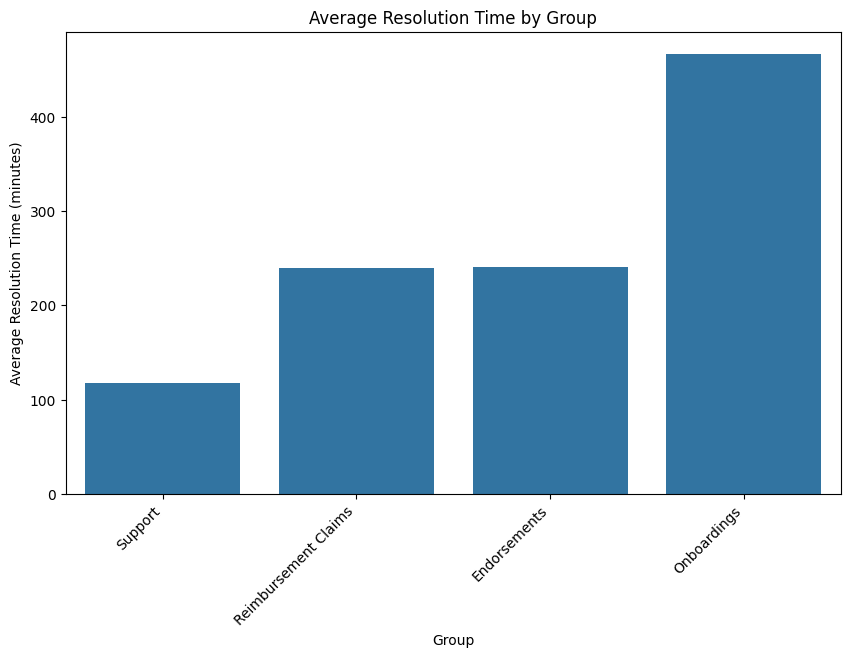

In [29]:
# 2. Views on efficiency for different groups
# Calculate and plot average resolution time for each group
group_efficiency = df.groupby('Group')['Resolution time'].mean().sort_values()
plt.figure(figsize=(10, 6))
sn.barplot(x=group_efficiency.index, y=group_efficiency.values)
plt.title('Average Resolution Time by Group')
plt.xlabel('Group')
plt.ylabel('Average Resolution Time (minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [31]:
# 3. Tickets taking the most time to resolve
# Identify ticket types and their average resolution time
ticket_types = df['Group'].unique()  # Assuming there is a 'Type' column
type_resolution_time = {}

for ticket_type in ticket_types:
    type_resolution_time[ticket_type] = df[df['Group'] == ticket_type]['Resolution time'].mean()

# Create a table
from tabulate import tabulate

table = tabulate(type_resolution_df, headers='keys', tablefmt='pretty', showindex=False)

# Print the table
print("\nTicket Types and Average Resolution Time:")
print(table)


Ticket Types and Average Resolution Time:
+----------------------+-------------------------+
|     Ticket Type      | Average Resolution Time |
+----------------------+-------------------------+
|     Onboardings      |   466.75680412006636    |
|     Endorsements     |   241.02145682173602    |
| Reimbursement Claims |   239.34989639619127    |
|       Support        |   117.09284532509137    |
+----------------------+-------------------------+


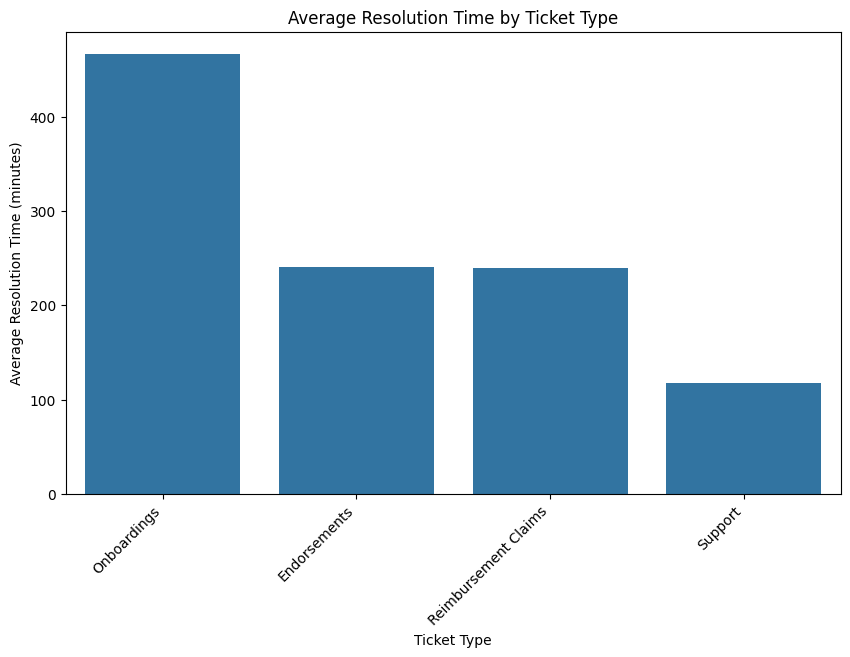

In [32]:
# Create a bar chart
plt.figure(figsize=(10, 6))
sn.barplot(x=type_resolution_df['Ticket Type'], y=type_resolution_df['Average Resolution Time'])
plt.title('Average Resolution Time by Ticket Type')
plt.xlabel('Ticket Type')
plt.ylabel('Average Resolution Time (minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()